In [1]:
from scipy.sparse import load_npz
user_traits_matrix = load_npz('fulldata2.npz')
user_traits_matrix

<67768573x5197 sparse matrix of type '<class 'numpy.float64'>'
	with 1148025491 stored elements in Compressed Sparse Row format>

In [2]:
h, w = user_traits_matrix.shape

In [3]:
import pandas as pd
import numpy as np
import surprise as sp
from surprise.model_selection import train_test_split, cross_validate
from scipy import sparse
import time
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import implicit
%matplotlib inline

In [4]:
als = implicit.als.AlternatingLeastSquares(factors=10, regularization=100, calculate_training_loss=True, iterations=5)
user_traits_matrix = user_traits_matrix.T.tocsr()

In [5]:
%%time
als.fit(user_traits_matrix)

100%|██████████| 5.0/5 [31:48<00:00, 346.92s/it, loss=0.00215]

CPU times: user 3h 34min 9s, sys: 3h 55min 39s, total: 7h 29min 48s
Wall time: 35min 40s


In [6]:
import pickle
file_Name = "model.pickle"
fileObject = open(file_Name,'wb')
pickle.dump(als,fileObject) 

In [7]:
latent_space = als.user_factors
print(als.item_factors.shape)
print(als.user_factors.shape)

(5197, 10)
(67768573, 10)


In [12]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
dbs = KMeans(n_clusters=4, init='k-means++').fit(latent_space)

In [13]:
plt.rcParams['figure.dpi'] = 100

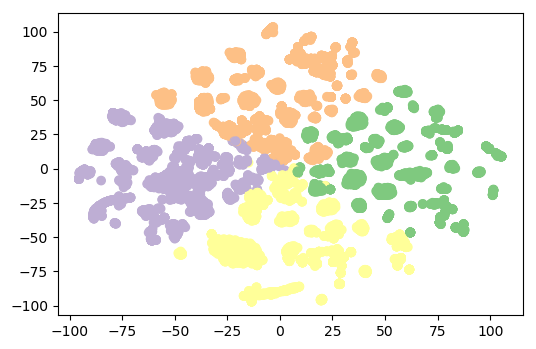

In [14]:
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
latent_space = tsne.fit_transform(als.user_factors[:10000])
plt.scatter(latent_space[:,0], latent_space[:,1], c=plt.cm.Accent(dbs.labels_[:10000]))
# plt.legend(handles=['cluster 0','cluster 1','cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])
plt.show()

In [5]:
user_traits_matrix = user_traits_matrix.T

In [6]:
all_cols = np.arange(user_traits_matrix.shape[1])
cols_to_keep = np.where(np.logical_not(np.in1d(all_cols, 799)))[0]
user_traits_matrix_without800 = user_traits_matrix[:, cols_to_keep]

In [7]:
user_traits_matrix_without800.shape

(67768573, 5196)

In [8]:
%%time
als.fit(user_traits_matrix_without800.T)

100%|██████████| 5.0/5 [30:09<00:00, 328.65s/it, loss=0.00241]

CPU times: user 3h 40min 27s, sys: 3h 46min 20s, total: 7h 26min 47s
Wall time: 34min 25s


In [9]:
latent_space = als.user_factors
print(als.item_factors.shape)
print(als.user_factors.shape)

(5196, 10)
(67768573, 10)


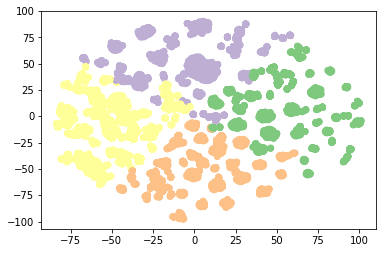

In [14]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import manifold
kmeans = KMeans(n_clusters=4, init='k-means++').fit(latent_space)
tsne = manifold.TSNE(n_components=2, init='pca')
latent_space = tsne.fit_transform(als.user_factors[:10000])
plt.scatter(latent_space[:,0], latent_space[:,1], c=plt.cm.Accent(kmeans.labels_[:10000]))
# plt.legend(handles=['cluster 0','cluster 1','cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])
plt.show()

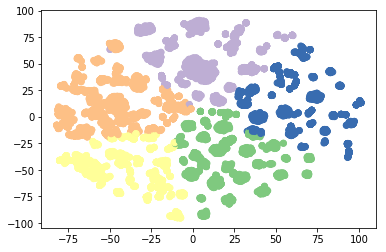

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++').fit(latent_space)
tsne = manifold.TSNE(n_components=2, init='pca')
latent_space = tsne.fit_transform(als.user_factors[:10000])
plt.scatter(latent_space[:,0], latent_space[:,1], c=plt.cm.Accent(kmeans.labels_[:10000]))
# plt.legend(handles=['cluster 0','cluster 1','cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])
plt.show()

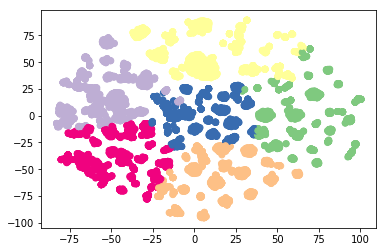

In [13]:
kmeans = KMeans(n_clusters=6, init='k-means++').fit(latent_space)
tsne = manifold.TSNE(n_components=2, init='pca')
latent_space = tsne.fit_transform(als.user_factors[:10000])
plt.scatter(latent_space[:,0], latent_space[:,1], c=plt.cm.Accent(kmeans.labels_[:10000]))
# plt.legend(handles=['cluster 0','cluster 1','cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])
plt.show()

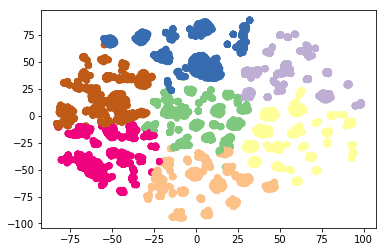

In [16]:
kmeans = KMeans(n_clusters=7, init='k-means++').fit(latent_space)
tsne = manifold.TSNE(n_components=2, init='pca')
latent_space = tsne.fit_transform(als.user_factors[:10000])
plt.scatter(latent_space[:,0], latent_space[:,1], c=plt.cm.Accent(kmeans.labels_[:10000]))
# plt.legend(handles=['cluster 0','cluster 1','cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])
plt.show()

In [17]:
import pickle
file_Name = "All_user_After_remove_800.pickle"
fileObject = open(file_Name,'wb')
pickle.dump(latent_space,fileObject) 

In [5]:
import pickle
latent_space = pickle.load("All_user_After_remove_800.pickle")

TypeError: file must have 'read' and 'readline' attributes